In [119]:
!pip install pmdarima
!pip install yfinance

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

<b> Importing data from yahoo Finance </b>

In [121]:
Gold = yf.Ticker("GC=F")

In [122]:
Gold_info=Gold.info
Gold_data = Gold.history(period="5Y")

In [123]:
Gold_data.reset_index(inplace=True)
Gold_data.tail()
Gold_data.drop(['Dividends','Stock Splits'],inplace = True, axis =1)

<b> Gold Data info of 5 years </b>

In [124]:
Gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1246 non-null   datetime64[ns]
 1   Open    1246 non-null   float64       
 2   High    1246 non-null   float64       
 3   Low     1246 non-null   float64       
 4   Close   1246 non-null   float64       
 5   Volume  1246 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 58.5 KB


In [125]:
Gold_data.describe()

,Open,High,Low,Close,Volume
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,1465.070545,1471.510756,1458.327448,1464.933147,6073.872392
std,250.096164,252.968941,247.216331,250.213279,33801.189750
min,1126.900024,1132.800049,1123.900024,1127.800049,0.000000
25%,1267.450012,1270.274963,1262.024994,1266.524994,34.000000
50%,1327.000000,1331.450012,1323.400024,1326.250000,146.000000
75%,1726.300049,1733.174957,1715.074982,1725.124969,521.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


<b>How Gold Data Varied in 5 years</b>

<AxesSubplot:>

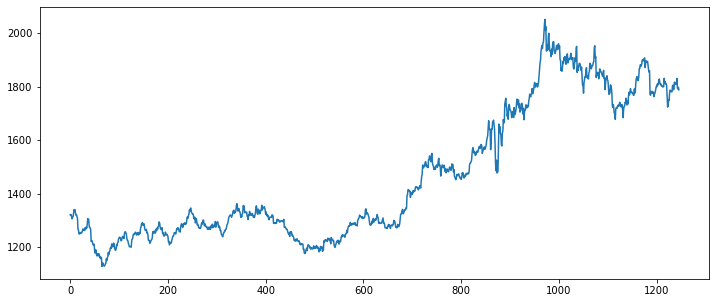

In [126]:
Gold_data['Close'].plot(figsize=(12,5))

In [127]:
Gold_data.dropna()
best_order = auto_arima(Gold_data['Close'],trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10218.150, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10214.186, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10215.782, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10215.810, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10213.008, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10217.325, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.524 seconds


In [128]:
Close_gold_data = pd.DataFrame(Gold_data['Close'])

In [129]:
Close_gold_data

,Close
0,1321.000000
1,1319.000000
2,1321.500000
3,1313.500000
4,1305.800049
...,...
1241,1830.900024
1242,1795.900024
1243,1790.699951
1244,1797.400024


<b> Spliting Training and Testing dataset in the model </b> 

In [168]:
Train, Test = Close_gold_data[0:int(len(Close_gold_data)*0.80)], Close_gold_data[int(len(Close_gold_data)*0.80):]

In [169]:
Train

,Close
0,1321.000000
1,1319.000000
2,1321.500000
3,1313.500000
4,1305.800049
...,...
991,1927.599976
992,1923.900024
993,1933.000000
994,1944.699951


In [170]:
Test

,Close
996,1937.800049
997,1953.099976
998,1956.300049
999,1960.199951
1000,1940.000000
...,...
1241,1830.900024
1242,1795.900024
1243,1790.699951
1244,1797.400024


<b>Preparation of Model</b>

In [171]:
model = ARIMA(Train, order=(0,1,0))
model = model.fit()
model.summary()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  995
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3984.439
Method:                           css   S.D. of innovations             13.270
Date:                Sun, 12 Sep 2021   AIC                           7972.878
Time:                        11:35:11   BIC                           7982.683
Sample:                             1   HQIC                          7976.605
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6364      0.421      1.513      0.130      -0.188       1.461
==============================================================================
"""

<b> Prediction via Data Visualization</b>

<AxesSubplot:>

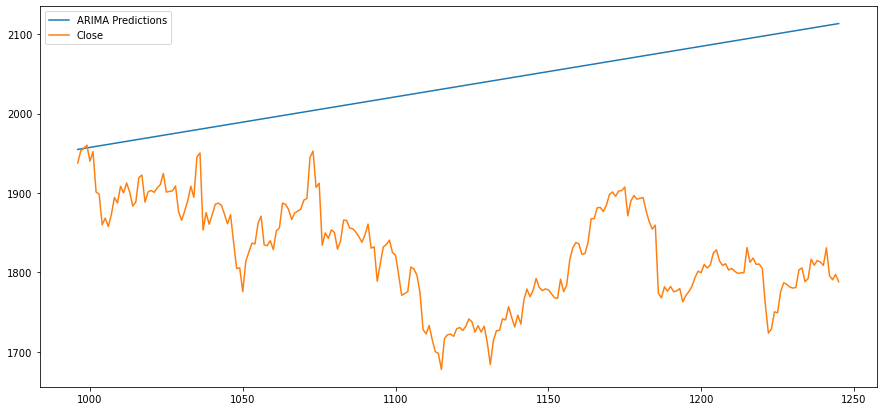

In [216]:
start = len(Train)
end = len(Train)+len(Test)-1
prediction = model.predict(start = start, end = end, typ='levels').rename("ARIMA Predictions")
prediction.plot(legend = True, figsize=(15,7))
Test['Close'].plot(legend = True)

In [181]:
rmse = sqrt(mean_squared_error(Test, prediction))
rmse

228.60645828059086

In [186]:
average = Test.mean()

In [196]:
Percentage_error = (rmse/average)*100
print('Error is', round(Percentage_error[0]), '%')

Error is 13 %


<AxesSubplot:>

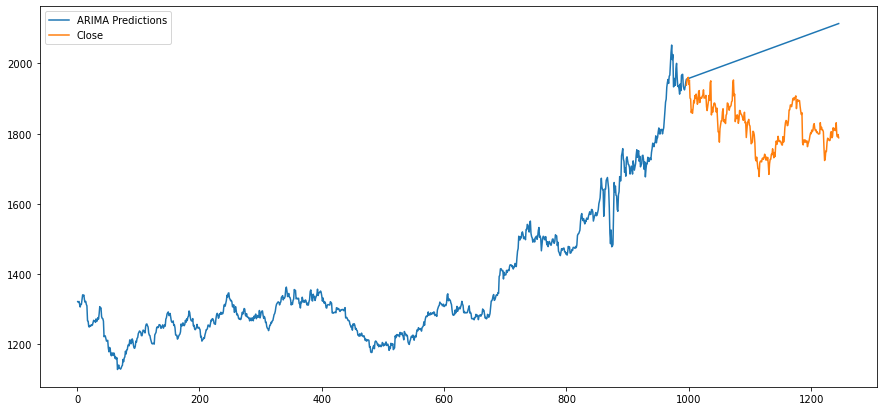

In [217]:
start = 1
end = 1245
prediction = model.predict(start = start, end = end, typ='levels').rename("ARIMA Predictions")
prediction.plot(legend = True, figsize=(15,7))
Test['Close'].plot(legend = True)

<AxesSubplot:>

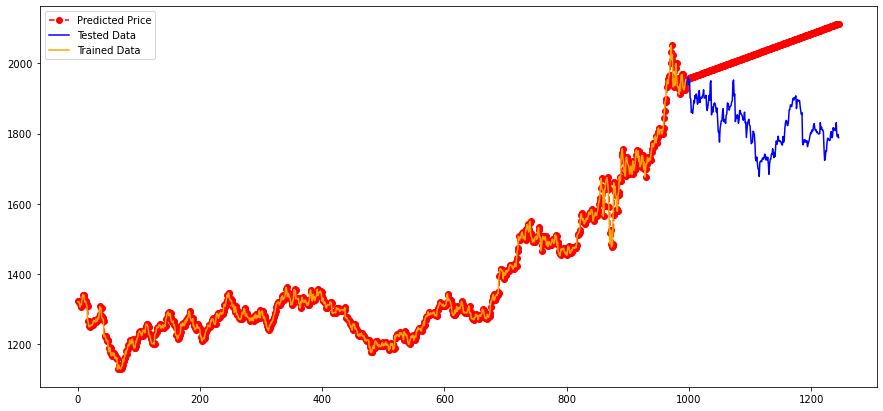

In [215]:
start = 1
end = 1245
prediction = model.predict(start = start, end = end, typ='levels')
prediction.plot(legend = True, color = 'red', linestyle = 'dashed',marker = 'o', label = 'Predicted Price', figsize=(15,7))
Test['Close'].plot(legend = True, color = 'blue', label = 'Tested Data')
Train['Close'].plot(legend = True, color = 'orange', label = 'Trained Data')

<b> Price Predication for next 30 days</b>

<AxesSubplot:>

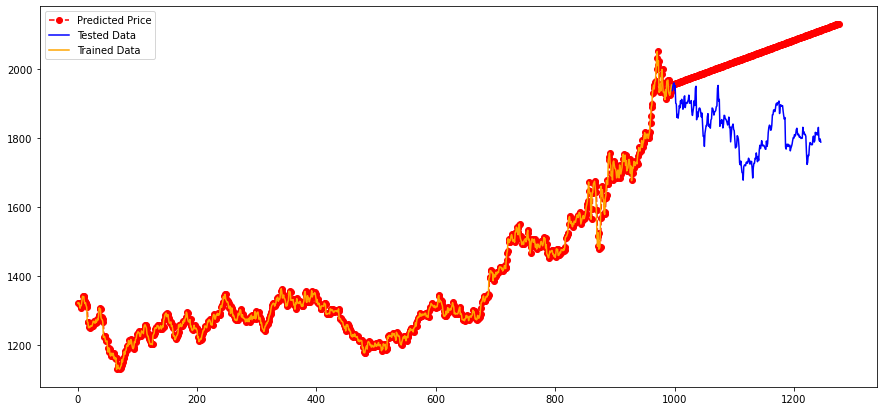

In [219]:
start = 1
end = 1275
prediction = model.predict(start = start, end = end, typ='levels')
prediction.plot(legend = True, color = 'red', linestyle = 'dashed',marker = 'o', label = 'Predicted Price', figsize=(15,7))
Test['Close'].plot(legend = True, color = 'blue', label = 'Tested Data')
Train['Close'].plot(legend = True, color = 'orange', label = 'Trained Data')

<b>If we see the graph there is a fall in graph from data index 1000 to 1200 and the reason behind it is COVID 19 impact on world economy. We can see from here that the start date is september 2017 when covid 19 impact was on its peak thus we can also analyse a data too</b>  

In [221]:
Gold_data[1000:1200]

,Date,Open,High,Low,Close,Volume
1000,2020-09-17,1939.000000,1946.000000,1933.699951,1940.000000,67
1001,2020-09-18,1950.500000,1952.099976,1949.000000,1952.099976,38
1002,2020-09-21,1946.199951,1946.199951,1883.400024,1901.199951,52
1003,2020-09-22,1913.099976,1913.099976,1898.599976,1898.599976,331
1004,2020-09-23,1875.500000,1875.500000,1859.900024,1859.900024,5
...,...,...,...,...,...,...
1195,2021-06-30,1761.099976,1770.800049,1759.199951,1770.800049,51
1196,2021-07-01,1775.699951,1781.199951,1768.800049,1775.900024,44
1197,2021-07-02,1778.699951,1787.900024,1778.300049,1782.599976,23
1198,2021-07-06,1786.699951,1809.800049,1786.699951,1793.500000,332


<b> Importing silver data from yahoo finance and plotting its prediction</b>

In [220]:
Silver = yf.Ticker("SI=F")

In [222]:
Silver_info=Silver.info
Silver_data = Silver.history(period="5Y")

In [223]:
Silver_data.reset_index(inplace=True)
Silver_data.tail()
Silver_data.drop(['Dividends','Stock Splits'],inplace = True, axis =1)

<AxesSubplot:>

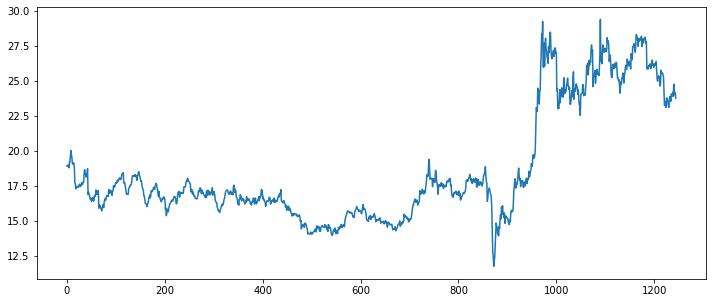

In [224]:
Silver_data['Close'].plot(figsize=(12,5))

In [225]:
Silver_data.dropna()
best_order = auto_arima(Silver_data['Close'],trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1177.760, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1203.415, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1182.549, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1185.174, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1201.538, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1181.427, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1182.371, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1174.734, Time=0.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1184.378, Time=0.22 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1176.177, Time=0.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1177.837, Time=1.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1174.920, Time=1.46 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1175.131, Time=0.59 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1178.146, Time=1.05 sec
 ARIMA(3,1,2)(0,0,0)[0]          

In [226]:
Close_silver_data = pd.DataFrame(Silver_data['Close'])

In [228]:
Train1, Test1 = Close_silver_data[0:int(len(Close_silver_data)*0.80)], Close_silver_data[int(len(Close_silver_data)*0.80):]

In [229]:
model = ARIMA(Train1, order=(3,1,2))
model = model.fit()
model.summary()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  995
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -268.216
Method:                       css-mle   S.D. of innovations              0.317
Date:                Sun, 12 Sep 2021   AIC                            550.432
Time:                        12:16:55   BIC                            584.751
Sample:                             1   HQIC                           563.479
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0079      0.010      0.761      0.447      -0.012       0.028
ar.L1.D.Close    -0.4510      0.135     -3.340      0.001      -0.716      -0.186
ar.L2.D.Close    -0.6527      0.131     -4.966      0.000      -0.910      -0.395
ar.L3.D.Close     0.0469      0.037      1.283      0.199      -0.025       0.118
ma.L1.D.Close     0.3878      0.133      2.922      0.003       0.128       0.648
ma.L2.D.Close     0.7400      0.101      7.300      0.000       0.541       0.939
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3772           -1.1450j            1.2056           -0.3006
AR.2           -0.3772           +1.1450j            1.2056            0.3006
AR.3           14.6807           -0.0000j           14.6807           -0.0000
MA.1           -0.2620           -1.1325j            1.1625           -0.2862
MA.2           -0.2620           +1.1325j            1.1625            0.2862
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

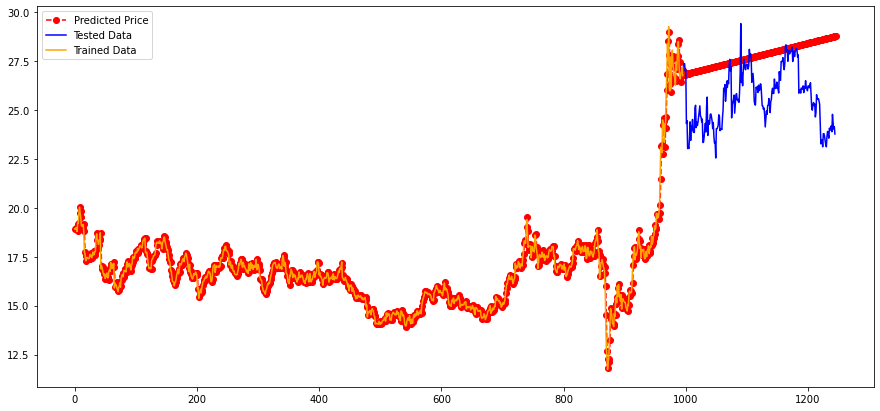

In [230]:
start = 1
end = 1245
prediction = model.predict(start = start, end = end, typ='levels')
prediction.plot(legend = True, color = 'red', linestyle = 'dashed',marker = 'o', label = 'Predicted Price', figsize=(15,7))
Test1['Close'].plot(legend = True, color = 'blue', label = 'Tested Data')
Train1['Close'].plot(legend = True, color = 'orange', label = 'Trained Data')

<AxesSubplot:>

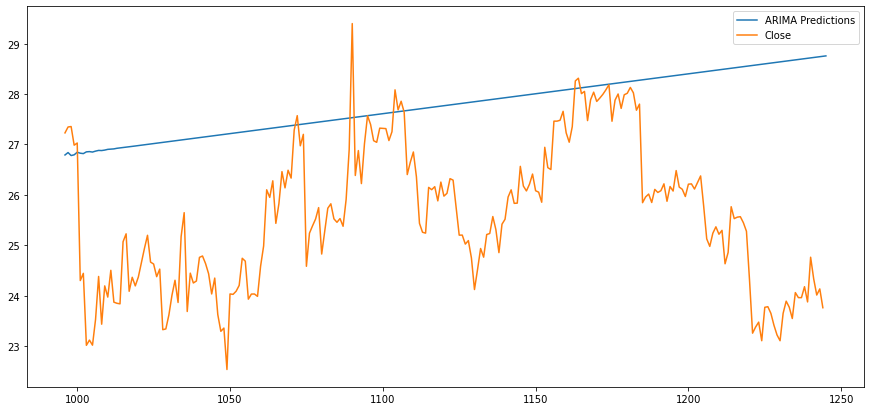

In [233]:
start = len(Train)
end = len(Train)+len(Test)-1
prediction = model.predict(start = start, end = end, typ='levels').rename("ARIMA Predictions")
prediction.plot(legend = True, figsize=(15,7))
Test1['Close'].plot(legend = True)